In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset
!unzip new-plant-diseases-dataset.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plan

In [ ]:
!unzip new-plant-diseases-dataset.zip -d ./plant-diseases

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: ./plant-diseases/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa_

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator #Data Augmentation
from tensorflow.keras.models import Sequential,Model #Model Olusturmak
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D #Katmanlari olusturmak
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import VGG16
from keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
import tensorflow as tf

In [ ]:
train_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
test_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

In [ ]:
class_names = os.listdir(train_dir)
batch_size=20

In [ ]:
traindata = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2,
                                   fill_mode='nearest')

testdata = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_generator=traindata.flow_from_directory(train_dir,
                                                             batch_size=batch_size,
                                                             class_mode="categorical",
                                                             target_size=(224,224),
                                                             color_mode="rgb",
                                                             shuffle=True )


test_data_generator=testdata.flow_from_directory(test_dir,
                                                           batch_size=batch_size,
                                                           class_mode="categorical",
                                                           target_size=(224,224),
                                                           color_mode="rgb",
                                                           shuffle=False )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())

In [ ]:
train_number=train_data_generator.samples
test_number=test_data_generator.samples

In [ ]:
vgg19 = VGG19(weights='imagenet',
              include_top=False,
              input_shape=(224, 224, 3))

vgg19.trainable = False

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
inputs = keras.Input(shape=(224, 224, 3))
x = vgg19(inputs, training=False)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(4096, activation="relu")(x)
x = keras.layers.Dense(4096, activation="relu")(x)
prediction3 = Dense(38, activation='softmax')(x)

VGG19_model = Model(inputs=inputs, outputs=prediction3)
VGG19_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dense_2 (Dense)             (None, 38)                155686    
                                                                 
Total params: 139725926 (533.01 MB)
Trainable params: 1197015

In [ ]:
VGG19_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            mode='max',
                                            verbose=1,
                                            patience=50,
                                            baseline=0.4,
                                            min_delta=0.0001,
                                            restore_best_weights=False)

In [ ]:
history= VGG19_model.fit(train_data_generator,
                   validation_data= test_data_generator,
                   shuffle=True,
                   epochs =50,
                   batch_size=20,
                   callbacks=[callback])

Epoch 1/50
3515/3515 [==============================] - 1307s 369ms/step - loss: 1.0526 - accuracy: 0.6812 - val_loss: 0.5089 - val_accuracy: 0.8297
Epoch 2/50
3515/3515 [==============================] - 1254s 357ms/step - loss: 0.6069 - accuracy: 0.7992 - val_loss: 0.5254 - val_accuracy: 0.8303
Epoch 3/50
3515/3515 [==============================] - 1267s 360ms/step - loss: 0.5203 - accuracy: 0.8260 - val_loss: 0.4086 - val_accuracy: 0.8610
Epoch 4/50
3515/3515 [==============================] - 1267s 360ms/step - loss: 0.4804 - accuracy: 0.8400 - val_loss: 0.4806 - val_accuracy: 0.8459
Epoch 5/50
3515/3515 [==============================] - 1254s 357ms/step - loss: 0.4569 - accuracy: 0.8500 - val_loss: 0.3763 - val_accuracy: 0.8762
Epoch 6/50
3515/3515 [==============================] - 1250s 356ms/step - loss: 0.4346 - accuracy: 0.8549 - val_loss: 0.3421 - val_accuracy: 0.8874
Epoch 7/50
3515/3515 [==============================] - 1236s 352ms/step - loss: 0.4128 - accuracy: 0.8639

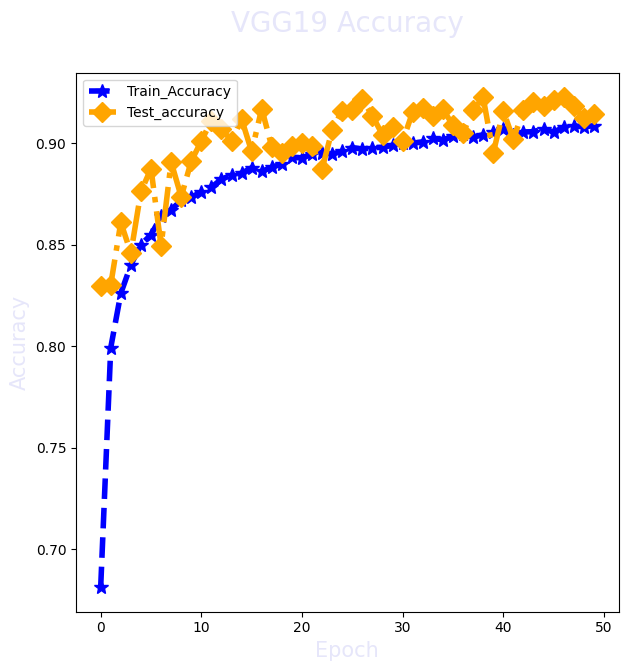

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'],marker="*",linestyle="--",color="blue",markersize=10,lw=4)
plt.plot(history.history['val_accuracy'],marker="D",linestyle="-.",color="orange",markersize=10,lw=4)
plt.title('VGG19 Accuracy\n',color="lavender",fontsize=20)
plt.ylabel('Accuracy',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Accuracy', 'Test_accuracy'], loc='upper left')
plt.show()

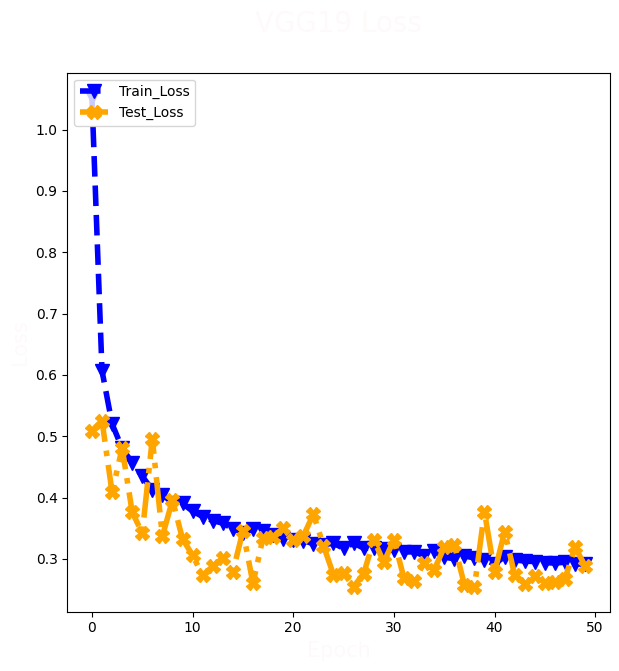

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'],marker="v",linestyle="--",color="Blue",markersize=10,lw=4)
plt.plot(history.history['val_loss'],marker="X",linestyle="-.",color="Orange",markersize=10,lw=4)
plt.title('VGG19 Loss\n',color="lavender",fontsize=20)
plt.ylabel('Loss',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Loss', 'Test_Loss'], loc='upper left')
plt.show()

In [ ]:
pred=VGG19_model.predict(test_data_generator,steps=test_number//batch_size + 1)
final_predict=np.argmax(pred,axis=1)
true_data=test_data_generator.classes

879/879 [==============================] - 122s 138ms/step


In [ ]:
print("Accuracy Score is",accuracy_score(true_data,final_predict))

Accuracy Score is 0.9145800136580924


In [ ]:
print("ROC AUC Score is {}".format(roc_auc_score(true_data, pred,multi_class='ovr')))

ROC AUC Score is 0.9983474194456614


In [ ]:
VGG19_model.save('vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('vgg19.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import csv
from google.colab import files


pred = VGG19_model.predict(test_data_generator, steps=test_number // batch_size + 1)  # steps + 1 ile fazladan adım alırız
final_predict = np.argmax(pred, axis=1)

true_data = test_data_generator.classes

print(f"Tahminlerin sayısı: {len(final_predict)}")
print(f"Gerçek sınıfların sayısı: {len(true_data)}")

min_samples = min(len(final_predict), len(true_data))
final_predict = final_predict[:min_samples]
true_data = true_data[:min_samples]

veri = np.array([final_predict, true_data])

print(veri.shape)
print(veri)

filename = 'tahmin_gercek_sonuclar_vgg19.csv'
with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Tahminler", "Gerçek Sonuçlar"])
    writer.writerows(veri.T)

files.download(filename)

loaded_data = np.genfromtxt(filename, delimiter=',', skip_header=1)

loaded_tahminler = loaded_data[:, 0]
loaded_gercek_sonuclar = loaded_data[:, 1]

print(loaded_tahminler)
print(loaded_gercek_sonuclar)

accuracy = np.sum(loaded_tahminler == loaded_gercek_sonuclar) / len(loaded_gercek_sonuclar)
print(f'Doğruluk: {accuracy}')


879/879 [==============================] - 120s 137ms/step
Tahminlerin sayısı: 17572
Gerçek sınıfların sayısı: 17572
(2, 17572)
[[ 0  0  0 ... 37 37 37]
 [ 0  0  0 ... 37 37 37]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.  0.  0. ... 37. 37. 37.]
[ 0.  0.  0. ... 37. 37. 37.]
Doğruluk: 0.9145800136580924


In [ ]:
num_classes = len(set(true_data))
true_data_bin = label_binarize(true_data, classes=range(num_classes))

avg_precisions = []
for class_idx in range(num_classes):
    y_true = true_data_bin[:, class_idx]
    y_pred = pred[:, class_idx]
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    avg_precisions.append(average_precision_score(y_true, y_pred))

macro_avg_precision = sum(avg_precisions) / num_classes

macro_avg_precision

0.9660485230196606

<Figure size 700x700 with 0 Axes>

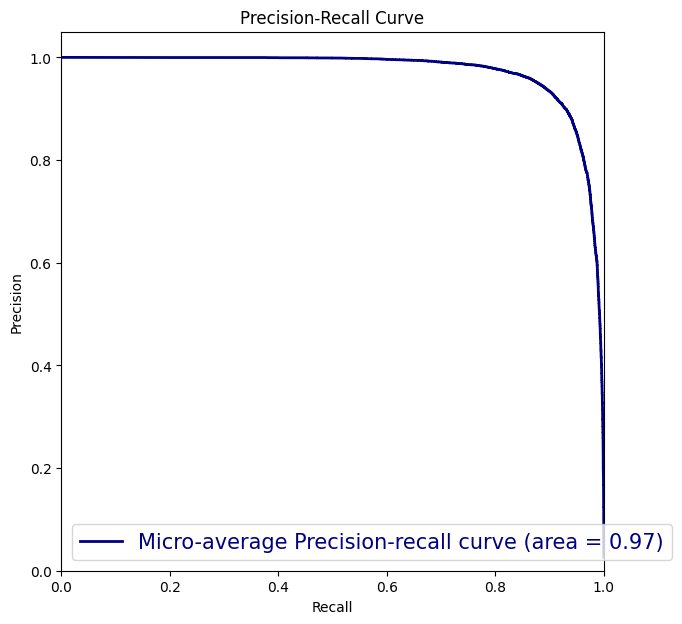

In [ ]:
plt.figure(figsize=(7, 7), facecolor='white')
binarize_label = label_binarize(true_data, classes=range(num_classes))
my_class = binarize_label.shape[1]

precision = dict()
recall = dict()
average_precision = dict()

for i in range(my_class):
    precision[i],recall[i], _ = precision_recall_curve(binarize_label[:,i],pred[:,i])
    average_precision[i]=average_precision_score(binarize_label[:,i],pred[:,i])

precision["micro"],recall["micro"], _ =precision_recall_curve(binarize_label.ravel(),pred.ravel())
average_precision["micro"]=average_precision_score(binarize_label,pred,average="micro")

plt.figure(figsize=(7,7))
plt.plot(recall["micro"], precision["micro"], label='Micro-average Precision-recall curve (area = {0:0.2f})'.format(average_precision["micro"]), linewidth=2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left",fontsize=15,labelcolor="navy")
plt.show()

<Figure size 700x700 with 0 Axes>

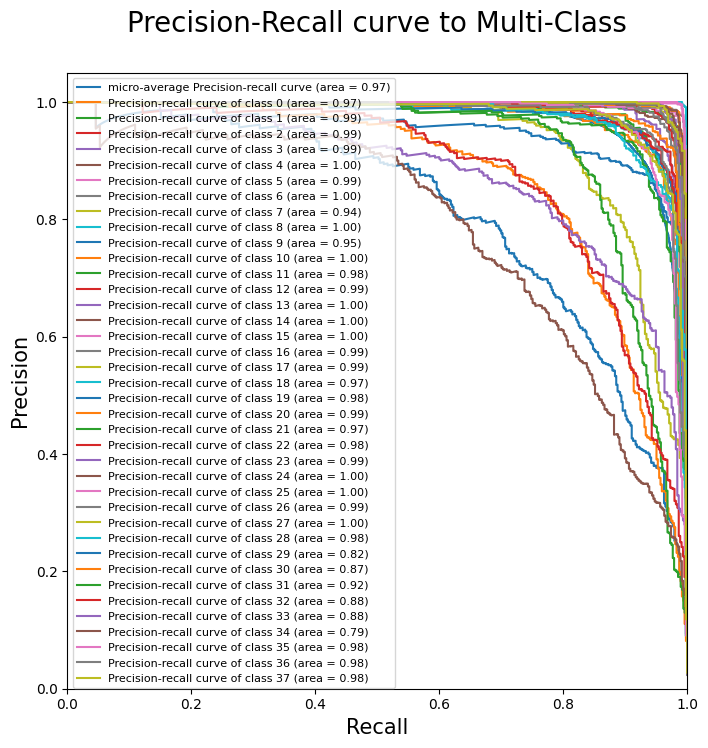

In [ ]:
plt.figure(figsize=(7, 7), facecolor='white')
plt.figure(figsize=(8, 8))
plt.plot(recall["micro"], precision["micro"], label='micro-average Precision-recall curve (area = {0:0.2f})'.format(average_precision["micro"]))
for i in range(my_class):
    plt.plot(recall[i], precision[i], label='Precision-recall curve of class {0} (area = {1:0.2f})'.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=15, color="black")
plt.ylabel('Precision', fontsize=15, color="black")
plt.title('Precision-Recall curve to Multi-Class\n', fontsize=20, color="black")
plt.legend(loc="best", fontsize=8, labelcolor="black")
plt.show()

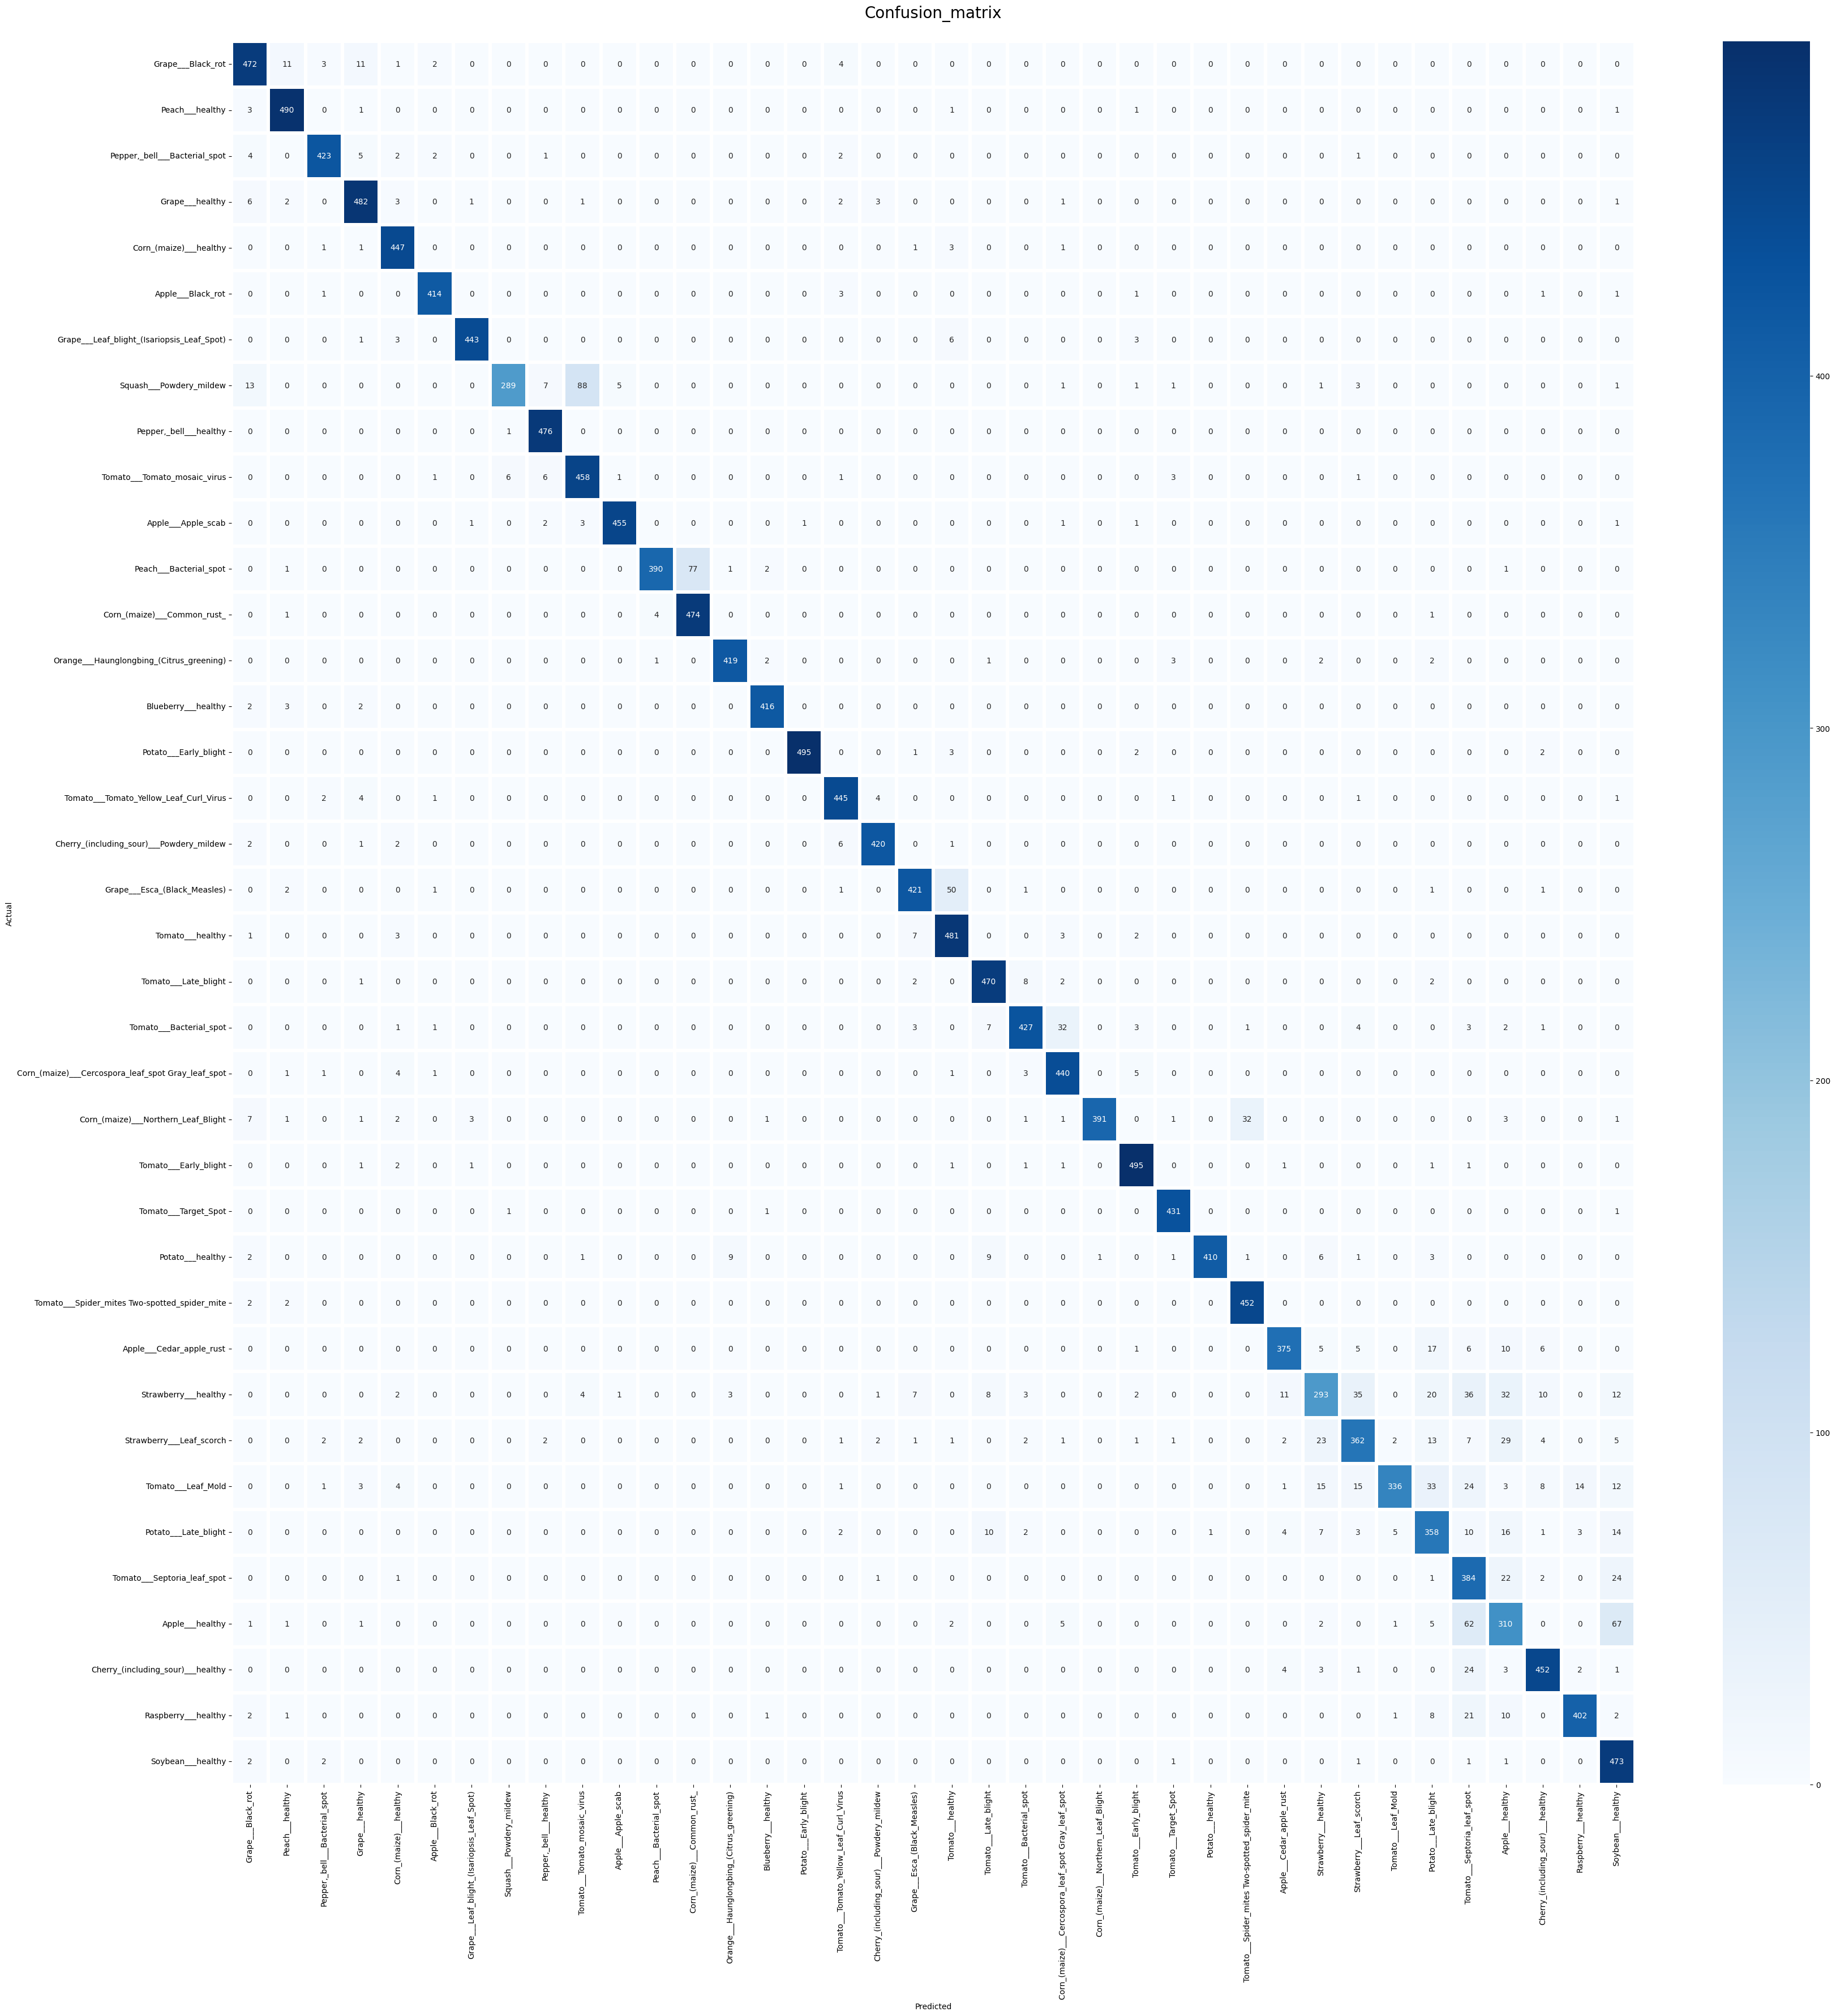

In [ ]:
plt.figure(figsize=(40,40))
cm= confusion_matrix(test_data_generator.classes,final_predict)
sns.heatmap(cm,  annot=True ,fmt="d",cmap="Blues",xticklabels=class_names,
            yticklabels=class_names,linewidth=4)
plt.title("Confusion_matrix\n",fontsize=20,color="black")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
print(classification_report(test_data_generator.classes, final_predict,target_names=class_list))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.91      0.94      0.92       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.97      0.96      0.97       440
                                   Apple___healthy       0.93      0.96      0.95       502
                               Blueberry___healthy       0.94      0.98      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.70      0.82       410
                       Corn_(maize)___Common_rust_       0.96      1.00      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.83      0.96      0.

In [ ]:
import random

class_name = list(test_data_generator.class_indices.keys())

image_indices = list(range(len(test_data_generator.filepaths)))
random.shuffle(image_indices)

plt.figure(figsize=(30, 30))
number_images = (5, 5)

for i in range(1, (number_images[0] * number_images[1]) + 1):
    plt.subplot(number_images[0], number_images[1], i)
    plt.axis("off")

    shuffled_index = image_indices[i - 1]

    true_label = class_name[test_data_generator.classes[shuffled_index]]
    predicted_label = class_name[final_predict[shuffled_index]]

    color = "green"
    if true_label != predicted_label:
        color = "red"

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
    plt.imshow(plt.imread(test_data_generator.filepaths[shuffled_index]))

plt.show()

Output hidden; open in https://colab.research.google.com to view.